# Project: Investigate a TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> In this project, I would be analyzing the TMDb Movies dataset. This dataset contains information about 10,000 movies collected from The Movies Database (TMDb), including user ratings and revenue. The dataset contains 21 columns:
* id 
* imdb_id
* popularity
* budget 
* revenue
* original_title
* cast
* homepage
* director
* tagline
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count
* vote_average
* release_year
* budget_adj
* revenue_adj

### Questions for Analysis
> - Which movies made the most revenue from 2000 - 2015?
> - Which genres were the most popular from year to year?
> - What is the association between revenue and user ratings?


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section, the data would be loaded and checked for missing values, duplicates and inaccurate data types.

In [2]:
# load data
df = pd.read_csv('tmdb-movies.csv')

df.shape

(10866, 21)

In [3]:
# view data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check missing values in columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# check missing values in rows
df.isnull().any(axis=1).sum()

8874

In [7]:
# check duplicates
df.duplicated().sum()

1

> From the data inspection performed above, the following were observed:
> - There are 9 columns and 8874 rows with missing values
> - The columns 'homepage', 'tagline', 'keywords' and 'production_companies' have large number of missing values, with 'homepage' having the highest (over half its values are missing).
> - The data has only one duplicate row

### Data Cleaning
> The data cleaning steps that would be performed on the data to prepare it for analysis are:
> - Extraneous columns would be dropped since most of these columns have large missing values. This would significantly reduce the number of missing values to be handled in a later step.
> - The only duplicate in the data would be dropped.
> - Rows still having missing values would be dropped.
> - The release date column would be converted to the correct data type

In [8]:
# drop columns with missing values
drop_columns = ['imdb_id','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(columns=drop_columns, axis=1, inplace=True)

In [9]:
# confirm
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# drop rows with missing values
df.dropna(inplace=True)

In [12]:
# convert release date to the correct data type
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
# confirm data shape after cleaning and trimming
df.shape

(10842, 13)

<a id='eda'></a>
## Exploratory Data Analysis
> After cleaning the data, I performed descriptive statistics and basic visualization of the data below, before proceding to answer the research questions posed in the introduction section of this project report. 

In [14]:
# get descriptive statistics of cleaned data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


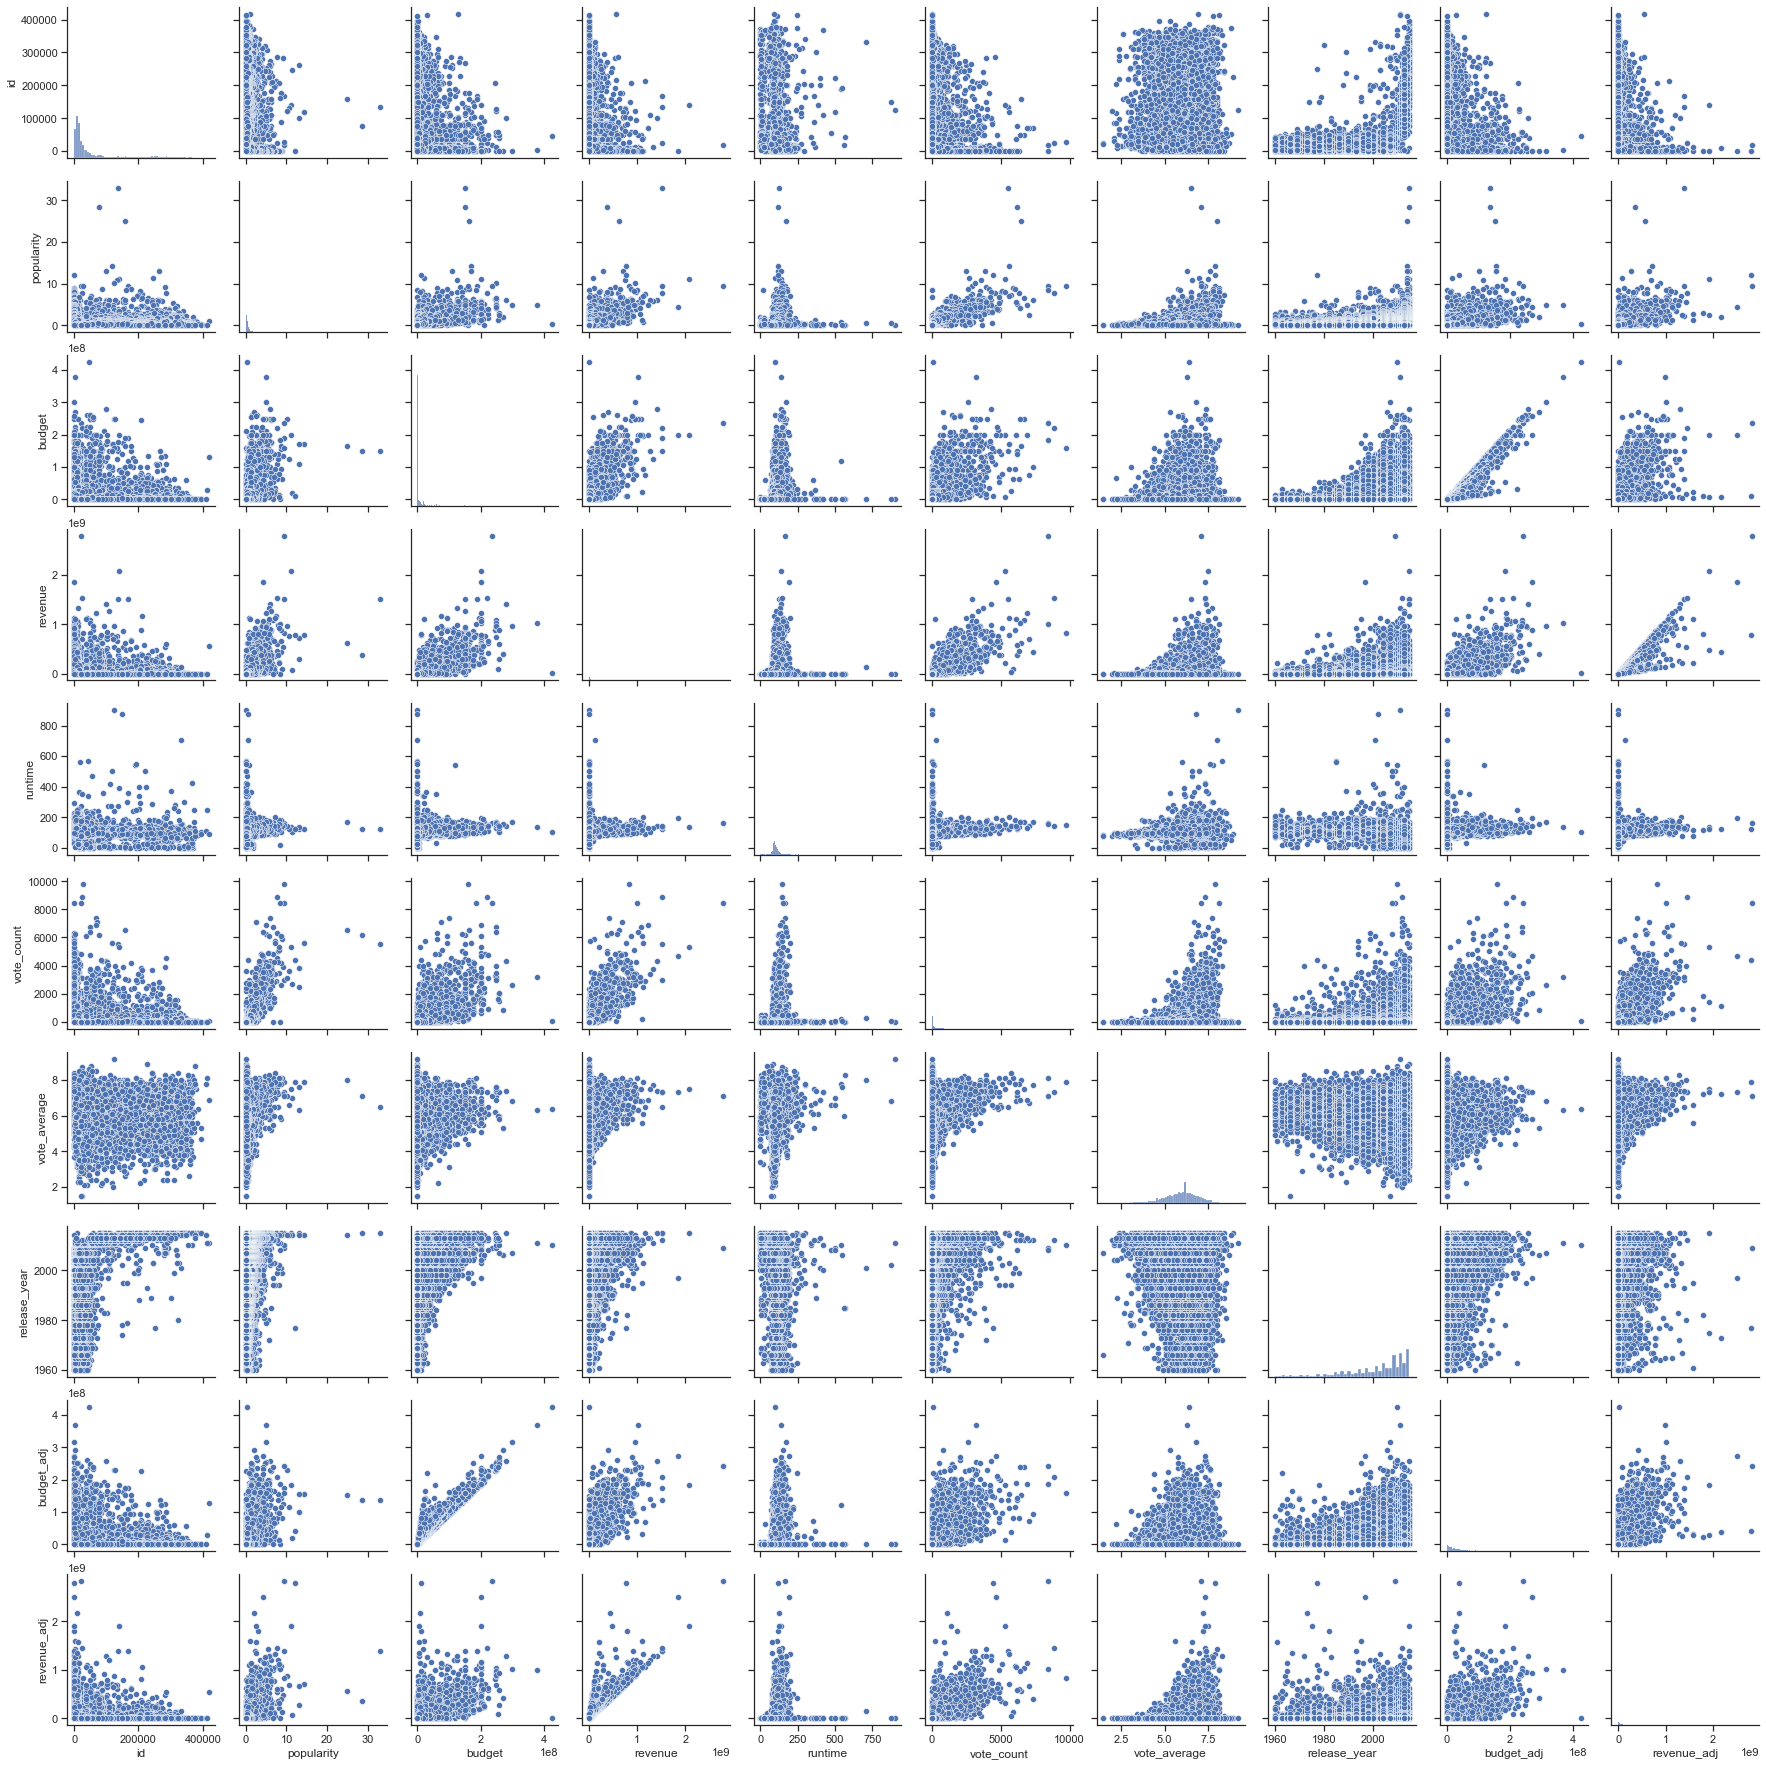

In [15]:
# plot scatter matrix of all columns in the data
sns.set(style="ticks")
sns.pairplot(df)

### Research Question 1: Which movies made the most revenue from 2000 - 2015?

> To answer the above question, I explored the data using the adjusted revenue, release year and original title columns. The specified duration and mean adjusted revenue was used to filter the data in order to eliminate rows with below average values. The filtered data was then sorted in descending order and the top 20 rows with the highest adjusted revenue were selected. The index and values of these top 20 rows was obtained and used to create a horizontal plot of movies titles versus revenue.

In [16]:
# check rows with revenue of 0
df.query('revenue == 0').shape

(5993, 13)

In [17]:
# get year range to use in filtering the data
year = np.arange(2000, 2016)
year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [18]:
# calculate mean of revenue
int(df['revenue_adj'].mean())

51477974

In [19]:
# filter the data by year and mean revenue
filtered_df = df[(df['release_year'].isin(year)) & 
                 (df['revenue_adj'] > 51477974)]

In [20]:
filtered_df.shape

(1326, 13)

In [21]:
filtered_df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [22]:
# sort the data in descending order
filtered_df = filtered_df.sort_values(by=['revenue_adj'], ascending=False)

In [23]:
# get the index of the top 20 sorted data
idx = filtered_df.index.tolist()[:20]

In [24]:
# get the movie title and adjusted revenue for visualization
x = []
y = []
for i in idx:
    yr = str(filtered_df.loc[i, 'release_year'])
    y.append(filtered_df.loc[i, 'original_title']+ ' ' +('({})'.format(yr)))
    x.append(filtered_df.loc[i, 'revenue_adj'])
    i+= 1

Text(0.5, 0, 'Revenue')

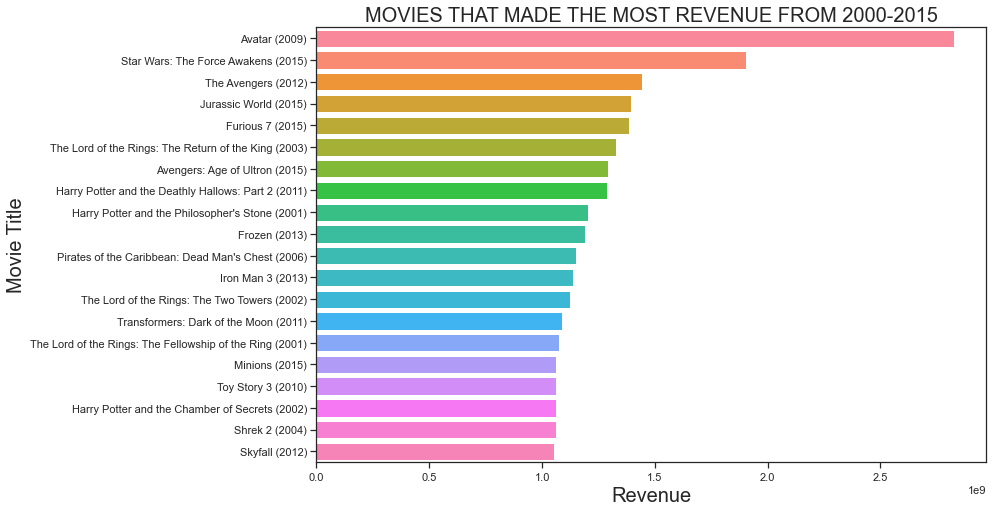

In [25]:
# Plot the revenue and movie title
f, ax = plt.subplots(figsize=(12, 8))
sns.set_color_codes("muted")
sns.barplot(x=x, y=y, saturation=1)
plt.title("MOVIES THAT MADE THE MOST REVENUE FROM 2000-2015", fontsize=20)
plt.ylabel("Movie Title",fontsize=20)
plt.xlabel("Revenue", fontsize=20)

### Research Question 2: Which genres were the most popular from year to year?

In [26]:
def popular_genre(year):
    '''
    To compute and visualize the most popular genres in a given year.
    
    arg
    year - (int or list) a specific year or list of years from 1960 - 2015.
    
    Returns
    ax - chart of the top popular genres for the given year
    
    '''
    # filter the data using the given year
    filter_df = df.query('release_year == {}'.format(year))
    
    # create a dummy df from filter_df genres column
    dummy_df = filter_df['genres'].str.get_dummies(sep="|")
    
    # add a popularity column to the dummy_df
    dummy_df['popularity'] = filter_df['popularity']
    
    # sort dummy_df by popularity in descending order
    dummy_df = dummy_df.sort_values(by=['popularity'], ascending=False)
    
    # get index of top 10 rows and create a new df with it
    ind = dummy_df.index.tolist()[:10]
    new_df = dummy_df.loc[ind, :]
    
    # sum all genres columns 
    cols_sum = new_df.loc[:, 'Action':'War'].sum().sort_values(ascending=False)
    
    # get x and y values from plot
    index = []
    value = []
    for i in cols_sum.index:
        if ((cols_sum[i] != 0.00000) & ((len(index)<=10) | (len(value)<=10))):
            index.append(i)
            value.append(cols_sum[i])
    
    # define plot
    ax = sns.barplot(x=index, y=value)
    ax.set(xlabel='GENRES', ylabel='POPULARITY COUNT')
    
    # set plot title based on whether argument is list or not
    if type(year) is list:
        ax.set(title='MOST POPULAR GENRES FROM {} to {}'.format(year[0], year[-1]))
    else:
        ax.set(title='MOST POPULAR GENRES IN {}'.format(year))
    
    # adjust plot size and font size
    ax.figure.set_size_inches(15,10)
    
    return ax

<AxesSubplot:title={'center':'MOST POPULAR GENRES IN 2010'}, xlabel='GENRES', ylabel='POPULARITY COUNT'>

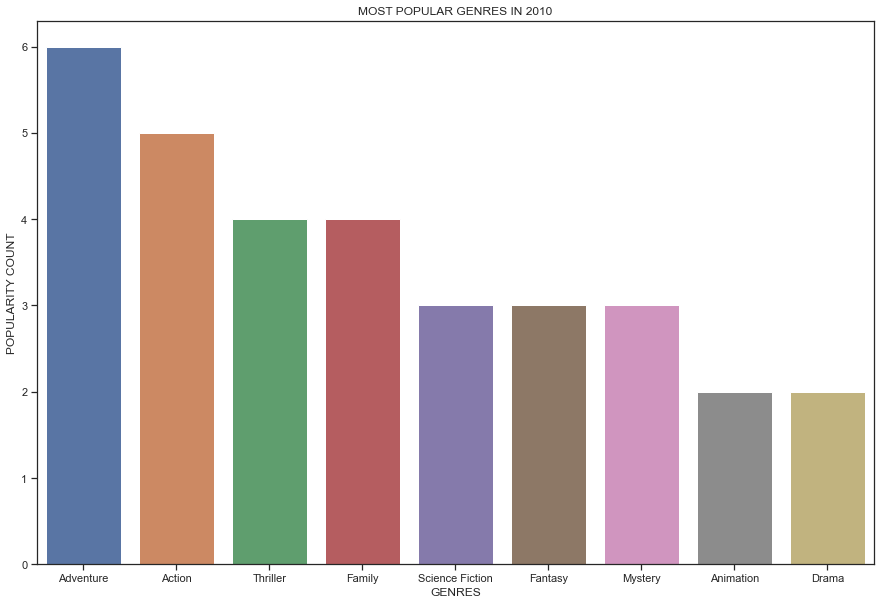

In [27]:
# function call
popular_genre(2010)

<AxesSubplot:title={'center':'MOST POPULAR GENRES FROM 1960 to 2015'}, xlabel='GENRES', ylabel='POPULARITY COUNT'>

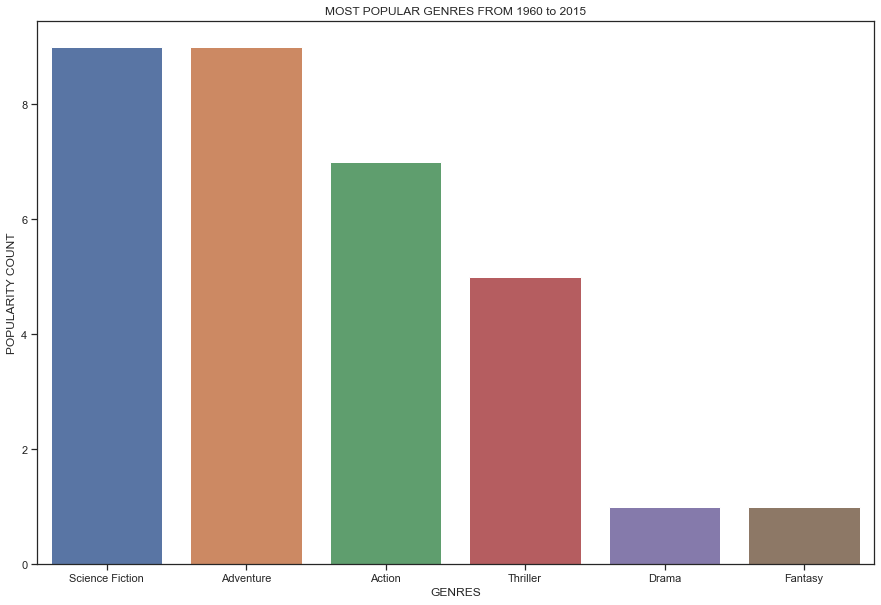

In [28]:
# function test
arr = list(np.arange(1960, 2016))
popular_genre(arr)

### Research Question 3: What is the association between revenue and user ratings?

<AxesSubplot:xlabel='popularity', ylabel='revenue_adj'>

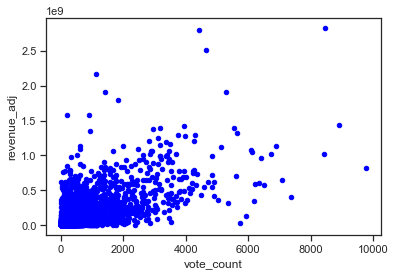

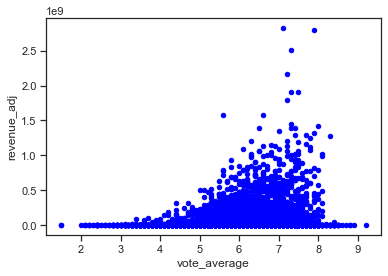

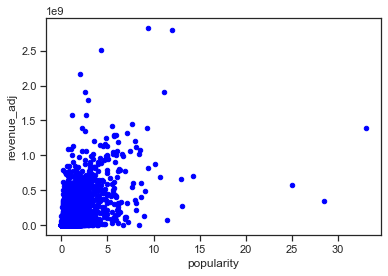

In [35]:
# scatter plot of revenue with vote count, vote average and popularity
df.plot(x='vote_count', y='revenue_adj', kind='scatter',color = 'blue')
df.plot(x='vote_average', y='revenue_adj', kind='scatter', color = 'blue')
df.plot(x='popularity', y='revenue_adj', kind='scatter', color = 'blue')

In [30]:
# correlation between revenue and other numeric columns
corr_mat = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
corr_df = pd.DataFrame(corr_mat).reset_index() # Convert to dataframe
corr_df.columns = ['col1', 'col2', 'correlation'] # Label
corr_df.query("col1 == 'revenue_adj' & col2 != 'revenue_adj'") # Filter

,col1,col2,correlation
13,revenue_adj,revenue,0.919088
20,revenue_adj,vote_count,0.707865
26,revenue_adj,budget_adj,0.646507
30,revenue_adj,budget,0.622406
32,revenue_adj,popularity,0.608964
49,revenue_adj,vote_average,0.193836
52,revenue_adj,runtime,0.175615
84,revenue_adj,release_year,-0.066118
94,revenue_adj,id,-0.138126


<function seaborn.rcmod.set(*args, **kwargs)>

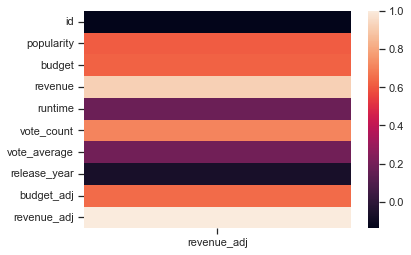

In [31]:
# correlation matrix between revenue and other columns
corr = df.corr()
revenue_corr = corr[['revenue_adj']]
sns.heatmap(revenue_corr)
sns.set

<a id='conclusions'></a>
## Conclusions
> The TMDb dataset contains 10866 rows and 21 columns. Descriptive and exploratory data analysis was performed on the data after cleaning. Below are the findings from the study:
> - The top grossing movie from year 2000 to 2015 was Avatar, with a revenue of over 2.8 billion US dollars.
> - The genres Adventure, Science Fiction, Action, Thriller and Drama were frequently among the top popular genres from year to year.
> - There is a positive correlation between revenue and user ratings measured by vote counts, and between revenue and popularity. 

### Limitations
> One of the limitations of this project is the large number of missing values in its string format columns. More than 75% of the rows in the data had missing values, with the homepage column having the highest missing values, followed by tagline, keywords and production_companies. 
Another limitation of the project is the lack of sufficient information to carry out a causal analysis on the observed relationships between revenue and user ratings. Hence, a cause - effect analysis of these observed correlations between revenue and popularity, and revenue and vote counts was not evaluated in this study.